In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree

pd.set_option("display.max_columns", None)

# 1 - Random Forest
### Predict 'Ave Rating' from ABV

In [3]:
# Read the csv file into a pandas DataFrame
data = pd.read_csv('./merged_df.csv')
data.head(8)

,Unnamed: 0,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,0,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.9,25,50,12,57,18,33,55,16,0,24,35,12,84,94,Long Trail Brewing Co.,1019498330,4.0,4.0,4.0,Suds,Altbier,4.0,4.5,Double Bag,7.2,273
1,1,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.9,25,50,12,57,18,33,55,16,0,24,35,12,84,94,Long Trail Brewing Co.,1113838346,4.5,4.0,4.0,canucklehead,Altbier,4.5,4.0,Double Bag,7.2,273
2,2,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.9,25,50,12,57,18,33,55,16,0,24,35,12,84,94,Long Trail Brewing Co.,1295820502,3.5,4.0,4.0,ElliotNess,Altbier,3.5,3.0,Double Bag,7.2,273
3,3,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.9,25,50,12,57,18,33,55,16,0,24,35,12,84,94,Long Trail Brewing Co.,1285456364,3.5,3.5,3.0,nerdrocker101,Altbier,3.5,3.5,Double Bag,7.2,273
4,4,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.9,25,50,12,57,18,33,55,16,0,24,35,12,84,94,Long Trail Brewing Co.,1285293842,4.0,3.5,3.5,MaxBrewell,Altbier,3.5,4.0,Double Bag,7.2,273
5,5,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.9,25,50,12,57,18,33,55,16,0,24,35,12,84,94,Long Trail Brewing Co.,1285206228,4.0,3.0,3.0,DJED69,Altbier,4.0,4.0,Double Bag,7.2,273
6,6,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.9,25,50,12,57,18,33,55,16,0,24,35,12,84,94,Long Trail Brewing Co.,1284754890,2.5,3.0,3.0,coldmeat23,Altbier,2.5,3.0,Double Bag,7.2,273
7,7,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.9,25,50,12,57,18,33,55,16,0,24,35,12,84,94,Long Trail Brewing Co.,1283965516,3.5,4.0,4.0,DrewCapzz,Altbier,4.0,4.0,Double Bag,7.2,273


In [4]:
# define Binary column ('hi_lo') where greater than or equal to median 
def f(row):

    if row['Ave Rating'] < 3.782:
        val = 0
    else:
        val = 1
    return val

data['hi_lo'] = data.apply(f, axis=1)
data.head(1)

,Unnamed: 0,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,hi_lo
0,0,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.9,25,50,12,57,18,33,55,16,0,24,35,12,84,94,Long Trail Brewing Co.,1019498330,4.0,4.0,4.0,Suds,Altbier,4.0,4.5,Double Bag,7.2,273,1


In [7]:
# reduce df
X = data[["ABV"]].values.reshape(-1, 1)

y = data['Ave Rating']

print(X.shape)
print(y.shape)

(376882, 1)
(376882,)


In [10]:
# Read the csv file into a pandas DataFrame
data2 = pd.read_csv('./beer_data_set.csv')

# reduce df
X = data2[["ABV"]].values.reshape(-1, 1)

y = data2['Ave Rating']

print(X.shape)
print(y.shape)

(5558, 1)
(5558,)


In [11]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X, y)  


RandomForestRegressor(random_state=0)

In [12]:
# test output by changing values
Y_pred = regressor.predict(np.array([7.2]).reshape(1, 1))
print(Y_pred)

[3.93047423]


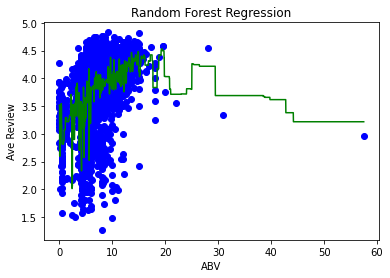

In [13]:
# Visualising the Random Forest Regression results
  
# from min value of x to max 
# value of x with a difference of 0.01 
X_grid = np.arange(min(X), max(X), 0.01) 
  
# reshape for reshaping the data into a len(X_grid)*1 array, 
# i.e. to make a column out of the X_grid value                  
X_grid = X_grid.reshape((len(X_grid), 1))
  
# Scatter plot for original data
plt.scatter(X, y, color = 'blue')  
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), 
         color = 'green') 
plt.title('Random Forest Regression')
plt.xlabel('ABV')
plt.ylabel('Ave Review')
plt.show()

In [14]:
# Perform the same regression on original dataset
data1 = pd.read_csv('./beer_data_set.csv')
print(len(data1))

5558


In [15]:
# reduce df
X = data1['ABV'].values.reshape(-1, 1)

y = data1['Ave Rating']

print(X.shape)
print(y.shape)

(5558, 1)
(5558,)


In [16]:
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X, y)  

RandomForestRegressor(random_state=0)

In [17]:
# test output by changing values
Y_pred = regressor.predict(np.array([7.2]).reshape(1, 1))
print(Y_pred)

[3.93047423]


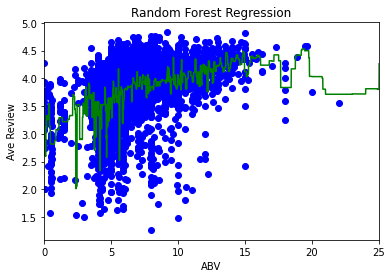

<Figure size 432x288 with 0 Axes>

In [18]:
# Visualising the Random Forest Regression results
  
# from min value of x to max 
# value of x with a difference of 0.01 
X_grid = np.arange(min(X), max(X), 0.01) 
  
# reshape for reshaping the data into a len(X_grid)*1 array, 
# i.e. to make a column out of the X_grid value                  
X_grid = X_grid.reshape((len(X_grid), 1))

  
# Scatter plot for original data
plt.scatter(X, y, color = 'blue')  
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), 
         color = 'green') 
plt.xlim(0, 25)
plt.title('Random Forest Regression')
plt.xlabel('ABV')
plt.ylabel('Ave Review')
plt.show()
plt.savefig("Forest_1.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="g",
            edgecolor ='w',
            orientation ='landscape')

In [19]:
# lets see which beer was so high in ABV :D
data1.sort_values('ABV', ascending=False).head()

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
474,Schorschbock 57%,75,Bock - Eisbock,3,Schorschbräu,Notes:,57.50,2.97,25,35,0,7,17,3,9,6,0,10,0,2,4
464,Schorschbock 31%,65,Bock - Eisbock,3,Schorschbräu,Notes:,30.86,3.34,25,35,4,5,14,2,16,6,0,10,2,4,10
4865,Samuel Adams UtopiasBoston Beer Company (Samue...,4507,Strong Ale - American,103,Boston Beer Company (Samuel Adams),Notes:Truly the epitome of brewing's two thous...,28.00,4.54,40,100,8,44,64,30,108,18,0,76,13,42,107
494,My Name Is Legion,95,Bock - Eisbock,3,Lehe Pruulikoda,Notes:,22.00,3.56,25,35,0,0,0,0,0,0,0,0,0,0,0
4901,Colossus,4543,Strong Ale - American,103,DuClaw Brewing Company,Notes:Brewed to push the limits of our own ski...,20.00,3.75,40,100,11,59,106,23,151,61,1,90,16,56,69


# Linear Regression of the same

In [20]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = data1['ABV'].values.reshape(-1, 1)

y = data1['Ave Rating'].values.reshape(-1, 1)



Text(0, 0.5, 'Ave Review')

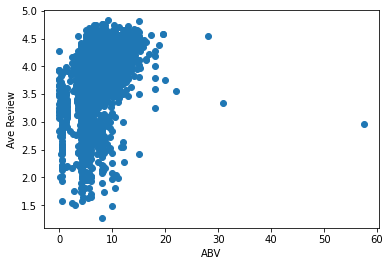

In [21]:
# Plot the data to see if a linear trend exists

plt.scatter(X, y)
plt.xlabel("ABV")
plt.ylabel("Ave Review")


In [22]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.15619953726163766
R-squared (R2 ): 0.17385211167895165
